<a href="https://colab.research.google.com/github/cpu-once/NationalScienceandTechnologyBigDataAnalysis/blob/main/bigdataExam_chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# colab 한글 폰트 설정을 위한 현재 설정된 폰트 확인
import matplotlib.font_manager as fm  # to manage font

# font file들의 경로를 가지는 list 반환.
sys_fonts=fm.findSystemFonts()
print(f"# of sys_font_family : {len(sys_fonts)}")
print(sys_fonts)

# Debian, Ubuntu등에서 사용가능한 Nanum fonts 확인.
nanum_fonts = [f for f in sys_fonts if 'Nanum' in f]
print(f"# of nanum_font family: {len(nanum_fonts)}")
print(nanum_fonts)

# 현재 FontEntry들을 출력 (ttf파일 기준)
ttf_fonts = fm.fontManager.ttflist
print(f"# of ttf_font entries: {len(ttf_fonts)}")
# for f in ttf_fonts:
#   print(f.name)

# 현재 Nanum font관련 FontEntry들을 출력 (ttf파일 기준)
nanum_font_entries = [f for f in ttf_fonts if 'Nanum' in f.name]
print(f"# of nanum ttf_font entries: {len(nanum_font_entries)}")
# for f in ttf_fonts:

# of sys_font_family : 56
['/usr/share/fonts/truetype/nanum/NanumSquare_acL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic-YetHangul.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',

In [96]:
# 나눔 폰트, Matplotlib 폰트 매니저에 추가
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [97]:
# 현재 폰트 확인
import matplotlib as mpl

print(f"font.family: {mpl.rcParams['font.family']}"),
print(f"font.size  : {mpl.rcParams['font.size']}")

font.family: ['NanumGothic']
font.size  : 12.0


In [98]:
# pandas의 read_csv를 이용하여 csv 파일을 데이터프레임 형태로 불러오기
from pandas import read_csv
titanic = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv')
print(titanic.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [99]:
# 데이터 기본 정보 확인

# PassengerId : 승객 고유 번호
# Survived :생존 여부, 1=생존, 0=사망
# Pclass :티켓 클래스
# Cabin : 객실 번호
# Embarked : 승선항, C=Cherbourg, Q=Queenstown, S=Southampton -> 질적 변수로 볼 수 있고
# Age, SibSp(동승한 형제 자매 및 배우자의 수)
# Parch(동승한 부모 및 자녀의 수)
# Fare(양적 변수)

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [100]:
# 결측치를 살펴보면, Age, Cabin, Embarked는 결측치가 있는 것으로 확인 된다.
# Cabin은 결측치가 과반수 이상이기 때문에 특성을 삭제하기로 하며,
# 이와 더불어 결측치는 없지만 수치적 의미가 없는 것으로 보이는 PassengerId도 삭제한다.

# 변수 별 데이터 타입을 살펴 보면, 수치로 표현된 데이터의 타입은 int64(정수), float64(실수)
# 로 텍스트로 표현된 데이터의 타입은 object로 되어 있는 것을 알 수 있다.

# 질적변수임에도 불구하고 양적변수로 표시된 Survived, Pclass와 나머지 질적 변수들의
# 데이터 타입은 아래와 같이 category 타입으로 변경할 수 있다.

# feature 삭제
del_feat = ['PassengerId', 'Cabin']
titanic = titanic.drop(del_feat, axis=1)

# 질적변수의 데이터 타입을 category로 변경
qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']

for col in qual:
  titanic[col] = titanic[col].astype('category')
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB
None


In [101]:
# 양적변수에 대해서는
# count (데이터 개수)
# mean (평균)
# std (표준 편차)
# min (최솟값)
# 25% (1사분위수)
# 50% (2사분위수)
# 75% (3사분위수)
# max (최댓값)

# .describe()의 파라미터 include를 'all' 로 설정하면 모든 데이터 타입의 변수에 대해 기술 통계를
# 제공하고, include=['float64', 'int64']와 같이 특정 데이터 타입의 리스트를 입력하면
# 해당 데이터 타입에 대한 기술통계만 확인할 수 있다.
print(titanic.describe(include=['float64', 'int64']))

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


In [102]:
# 질적변수에 대해서는
# count (데이터 개수)
# unique (범주형 변수의 level 개수)
# top (빈도가 가장 높은 level)
# freq (top leve의 빈도)

#Ticket은 681개라는 과도한 level을 가지고 있는 것을 확인하였고, 질적변수로서 분석할 의미가
# 없다고 판단하여 분석에서 삭제하기로 한다.

print(titanic.describe(include=['category']))

        Survived  Pclass                         Name   Sex Ticket Embarked
count        891     891                          891   891    891      889
unique         2       3                          891     2    681        3
top            0       3  van Melkebeke, Mr. Philemon  male   1601        S
freq         549     491                            1   577      7      644


In [103]:
# 도수분포표
from pandas import DataFrame
freq = DataFrame(titanic['Survived'].value_counts())
print(freq)

          count
Survived       
0           549
1           342


In [104]:
# 상대도수분포표 추가
freq['상대도수'] = titanic['Survived'].value_counts(normalize=True)
freq = freq.rename(columns={'count' : '도수'}) # 'count' 를 '도수'로 컬럼명 변경
print(freq)

           도수      상대도수
Survived               
0         549  0.616162
1         342  0.383838


In [105]:
# 상관계수, 스피어만 순위상관계수, 켄달의 타우

from scipy.stats import spearmanr, kendalltau
corr, p = spearmanr(titanic['Survived'], titanic['Pclass'])
print("스피어만 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr, p))

corr2, p2 = kendalltau(titanic['Survived'], titanic['Pclass'])
print("켄달타우 상관계수는 {:.3f}, p-value는 {:.3f}".format(corr2,p2))

스피어만 상관계수는 -0.340, p-value는 0.000
켄달타우 상관계수는 -0.324, p-value는 0.000


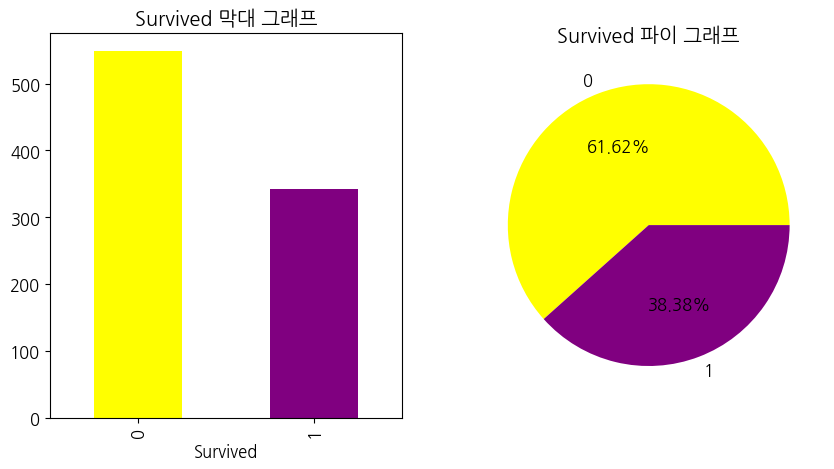

In [106]:
# 질적변수 탐색 시각화

#plotting 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 5) # 그래프 그리기
plt.rcParams["font.family"] = 'NanumGothic' # 글꼴
plt.rcParams["font.size"] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기
fig, ax = plt.subplots(1,2, figsize=(10, 5)) # 그래프 구성

# 막대 그래프
ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax=ax[0], color=['yellow', 'purple'])

# 파이 그래프
ax[1].set_title('Survived 파이 그래프')
ax[1].pie(freq['도수'].values, labels=freq['도수'].index, autopct = "%.2f%%", colors = ['yellow', 'purple'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Age     5 non-null      category
 1   count   5 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 429.0 bytes
None


In [128]:
# 계급의 개수를 지정하여 도수분포표 생성
# Pandas라이브러리의 cut을 사용하여, Age 변수를 5구간으로 나누고,
# .values_counts()를 적용하여 구간별 도수를 구하고
# .reset_index()를 통해 인덱스를 리셋한 후
# 구간별로 나눈 Age를 계급으로한 구간별로 오름차순으로 정렬

# 상대도수를 구하기 위해 .apply(lambda x: )를 사용하여 각 도수들(x)을 도수의 합(sum)
# 으로 나누었다.

from pandas import cut
result1 = cut(titanic['Age'], bins=5)
freq1 = DataFrame(result1.value_counts()).reset_index()
freq1 = freq1.rename(columns={'Age' :'계급', 'count' : '도수'}).sort_values(by='계급')

# freq1의 상대 도수분포표 추가
freq1['상대도수'] = freq1['도수'].apply(lambda x: x / freq1['도수'].sum())
print(freq1)

                 계급   도수      상대도수
2    (0.34, 16.336]  100  0.140056
0  (16.336, 32.252]  346  0.484594
1  (32.252, 48.168]  188  0.263305
3  (48.168, 64.084]   69  0.096639
4    (64.084, 80.0]   11  0.015406
